In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import random_noise

(415, 640, 3)

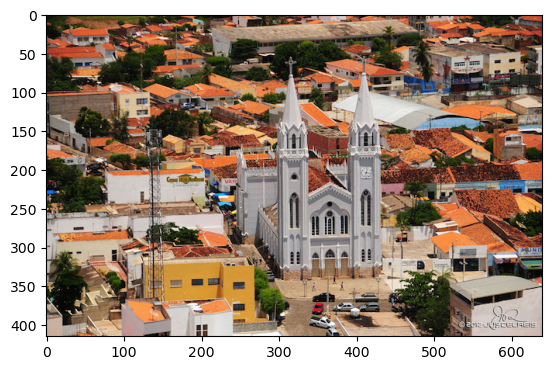

In [75]:
# Carregando a imagem
img = imread('picos.jpg')
plt.imshow(img, cmap='gray')

img.shape

(256, 256)

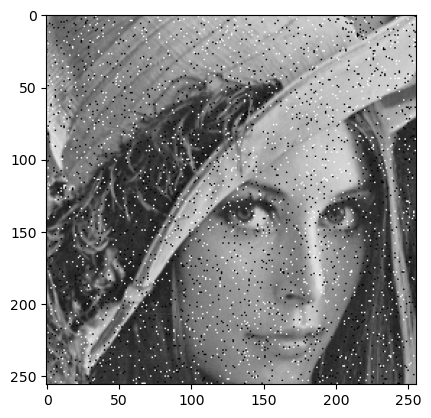

In [85]:
# Carregando a imagem
img = imread('mulher-ruido.png')
plt.imshow(img, cmap='gray')

img.shape

In [4]:
def imagemProcessada(imagem, a, b, borda):
    imagem_processada = None
    
    if borda == 'ignore':
        imagem_processada = np.delete(np.zeros(imagem.shape), range(a*2), axis=0)
        imagem_processada = np.delete(imagem_processada, range(b*2), axis=1)
    elif borda in ('espelho', 'zero', 'replicar'):
        imagem_processada = np.zeros(imagem.shape)
        
    return imagem_processada

In [5]:
# def trataBordas(imagem, a, b, borda='ignore'):
#     imagem_bordas_tratadas = None
    
#     quantidades = (a, b)

#     if borda == 'ignore':
#         imagem_bordas_tratadas = imagem.copy()
#     elif borda in ('espelho', 'zero', 'replicar'):
#         imagem_bordas_tratadas = np.insert(np.zeros(imagem.shape), range(a*2), [0], axis=0)
#         imagem_bordas_tratadas = np.insert(imagem_bordas_tratadas, range(b*2), [0], axis=1)
        
#         imagem_bordas_tratadas[a:imagem.shape[0]+a, b:imagem.shape[1]+b] = imagem.copy()
        
#         if borda in ('espelho', 'replicar'):
#             for i_img, i_img_bordas in ((0, 0), (imagem.shape[0]-1, imagem.shape[0]+a)):
#                 for j_img, j_img_bordas in ((0, 0), (imagem.shape[1]-1, imagem.shape[1]+b)):
#                     imagem_bordas_tratadas[i_img_bordas:i_img_bordas+a, j_img_bordas:j_img_bordas+b] = imagem[i_img, j_img]
            
#             if borda == 'espelho':
#                 for i in range(a):
#                     imagem_bordas_tratadas[a-i-1, b:imagem.shape[1]+b] = imagem[i, :]
#                     imagem_bordas_tratadas[imagem.shape[0]+a+i, b:imagem.shape[1]+b] = imagem[imagem.shape[0]-1-i, :]
                
#                 imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
#                 for i in range(b):
#                     imagem_bordas_tratadas[b-i-1, a:imagem.shape[0]+a] = imagem[:, i]
#                     imagem_bordas_tratadas[imagem.shape[1]+b+i, a:imagem.shape[0]+a] = imagem[:, imagem.shape[1]-1-i]
            
#                 imagem_bordas_tratadas = imagem_bordas_tratadas.T
#             elif borda == 'replicar':
#                 imagem_bordas_tratadas[0:a, b:imagem.shape[1]+b] = imagem[0, :]
#                 imagem_bordas_tratadas[imagem.shape[0]+a:imagem.shape[0]+a+a, b:imagem.shape[1]+b] = imagem[-1, :]
                
#                 imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
#                 imagem_bordas_tratadas[0:b, a:imagem.shape[0]+a] = imagem[:, 0]
#                 imagem_bordas_tratadas[imagem.shape[1]+b:imagem.shape[1]+b+b, a:imagem.shape[0]+a] = imagem[:, -1]
            
#                 imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
#     return imagem_bordas_tratadas

In [6]:
def trataBordas(imagem, a, b, borda='ignore'):
    imagem_bordas_tratadas = None
    
    quantidades = (a, b)

    if borda == 'ignore':
        imagem_bordas_tratadas = imagem.copy()
    elif borda in ('espelho', 'zero', 'replicar'):
        imagem_bordas_tratadas = np.insert(np.zeros(imagem.shape), range(a*2), [0], axis=0)
        imagem_bordas_tratadas = np.insert(imagem_bordas_tratadas, range(b*2), [0], axis=1)
        
        imagem_bordas_tratadas[a:imagem.shape[0]+a, b:imagem.shape[1]+b] = imagem.copy()
        
        if borda in ('espelho', 'replicar'):
            if borda == 'espelho':
                for i in range(a):
                    imagem_bordas_tratadas[a-i-1, b:imagem.shape[1]+b] = imagem[i, :]
                    imagem_bordas_tratadas[imagem.shape[0]+a+i, b:imagem.shape[1]+b] = imagem[imagem.shape[0]-1-i, :]
                
                imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
                for i in range(b):
                    imagem_bordas_tratadas[b-i-1, :] = imagem_bordas_tratadas[a+i, :]
                    imagem_bordas_tratadas[imagem.shape[1]+b+i, :] = imagem_bordas_tratadas[imagem.shape[1]+a-i, :]
            
                imagem_bordas_tratadas = imagem_bordas_tratadas.T
            elif borda == 'replicar':
                imagem_bordas_tratadas[0:a, b:imagem.shape[1]+b] = imagem[0, :]
                imagem_bordas_tratadas[imagem.shape[0]+a:imagem.shape[0]+a+a, b:imagem.shape[1]+b] = imagem[-1, :]
                
                imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
                imagem_bordas_tratadas[0:b, :] = imagem_bordas_tratadas[b, :]
                imagem_bordas_tratadas[imagem.shape[1]+b:imagem.shape[1]+b+b, :] = imagem_bordas_tratadas[imagem.shape[1]+b-1, :]
            
                imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
    return imagem_bordas_tratadas

In [7]:
def convolucao(imagem, filtro, borda='ignore'): 
    a = (filtro.shape[0] - 1)//2 # linhas
    b = (filtro.shape[1] - 1)//2 # colunas
    
    imagem_processada = imagemProcessada(imagem, a, b, borda)
    
    try:
        # Imagens com + de 1 canal
        canais = imagem.shape[2]
        
        for canal in range(canais):
            canal_bordas_tratadas = trataBordas(imagem[:, :, canal], a, b, borda)
        
            linha_fim = canal_bordas_tratadas.shape[0] - a
            coluna_fim = canal_bordas_tratadas.shape[1] - b

            for i in range(a, linha_fim):
                for j in range(b, coluna_fim):
                    imagem_processada[i-a, j-b, canal] = (canal_bordas_tratadas[i-a: i+a+1, j-b:j+b+1] * filtro).sum()
    except:
        canal_bordas_tratadas = trataBordas(imagem, a, b, borda)
        
        linha_fim = canal_bordas_tratadas.shape[0] - a
        coluna_fim = canal_bordas_tratadas.shape[1] - b

        for i in range(a, linha_fim):
            for j in range(b, coluna_fim):
                imagem_processada[i-a, j-b] = (canal_bordas_tratadas[i-a: i+a+1, j-b:j+b+1] * filtro).sum()
    
    return imagem_processada.astype('int')

In [9]:
filtro = np.ones((3, 3))

media = filtro*(1/(3*3))
gaussiano = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
    ])
sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ])
laplaciano = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
    ])
emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
    ])
filters = np.array([media, gaussiano, sobel, laplaciano, emboss])

In [64]:
bordas = ['ignore', 'zero', 'espelho', 'replicar']

In [78]:
def make_convolutions(img, filter, bordas, figsize=(15, 15)):
    try:
        canais = img.shape[2]
        cmap = None
    except:
        canais = 1
        cmap = 'gray'
    fig = plt.figure(figsize=figsize)
    fig.add_subplot(1, len(bordas) + 1, 1)
    plt.imshow(img, cmap=cmap)
    plt.title('original')
    for i in range(1, len(bordas) +1):
        fig.add_subplot(1, len(bordas) + 1, i+1)
        plt.imshow(convolucao(img, filter, bordas[i-1]), cmap=cmap)
        plt.title(bordas[i-1])

       

# Média



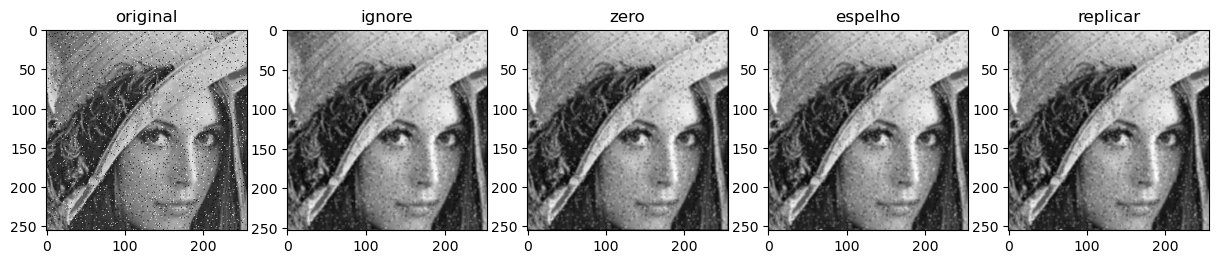

In [86]:
make_convolutions(img, media, bordas)

# Gaussiano
É possivel observar uma suavização da imagens, removendo alguns ruído e detalhes indesejados.

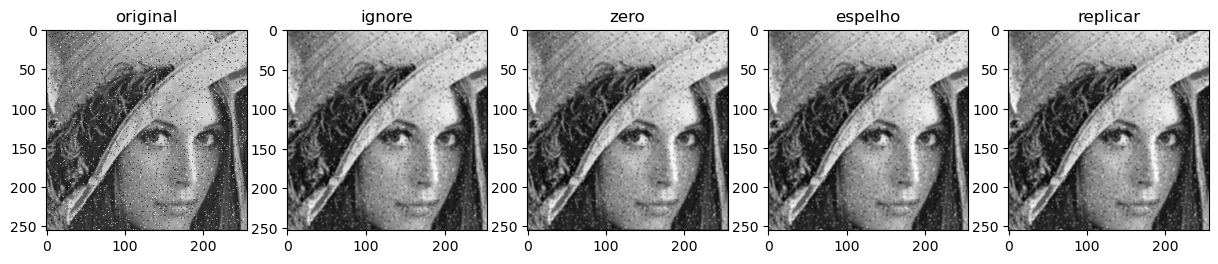

In [87]:
make_convolutions(img, gaussiano, bordas)

# Sobel
Retona as descontinuidades presentes na imagem.

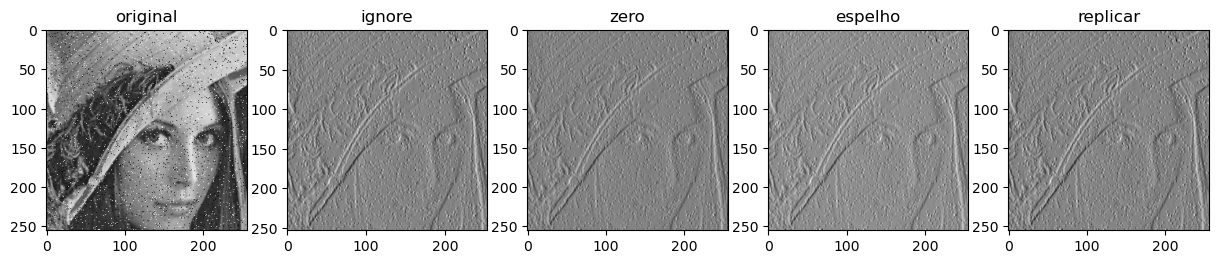

In [88]:
make_convolutions(img, sobel, bordas)

# Laplaciano
Retona as descontinuidades presentes na imagem de forma menos nitida em comparação ao algortmo anterior.

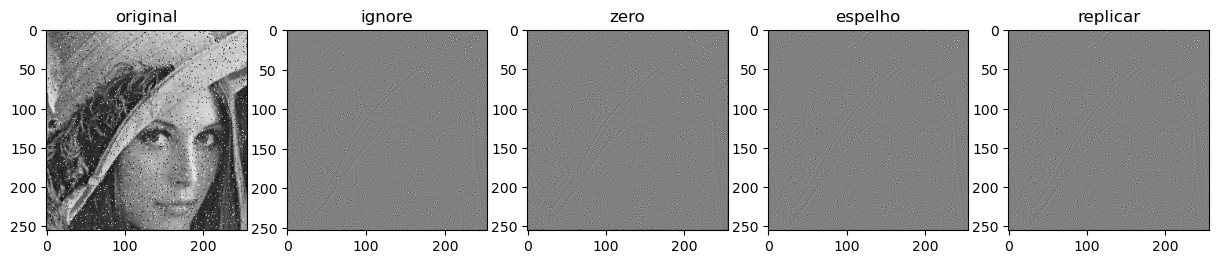

In [89]:
make_convolutions(img, laplaciano, bordas)

# Emboss
Utilizado para dar uma sensação de profundidade na imagem.

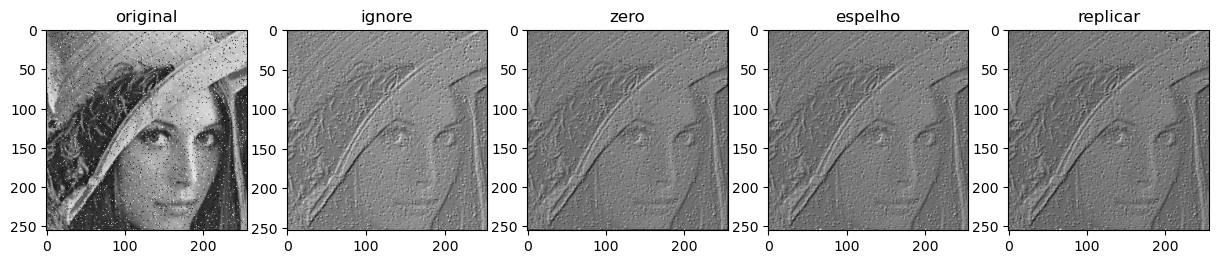

In [90]:
make_convolutions(img, emboss, bordas)

## Filtros não lineares

In [ ]:
img = imread('picos.jpg')
plt.imshow(img)

img.shape

In [ ]:
kernel = np.ones((5, 5))

In [ ]:
def median(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add):
    for i in range(linhas_add, imagem_bordas_tratadas.shape[0] - linhas_add):
        for j in range(colunas_add, imagem_bordas_tratadas.shape[1] - colunas_add):
            imagem_processada[i - linhas_add][j - colunas_add] = np.median(imagem_bordas_tratadas[i - linhas_add:i + linhas_add + 1, j - colunas_add:j + colunas_add + 1])
    return imagem_processada

In [ ]:
def calc_moda(kernel):
    vals, counts = np.unique(kernel, return_counts=True)

    maior_quantidade = counts.max()

    modas = vals[counts == maior_quantidade]
    
    return modas.mean()

In [ ]:
def moda(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add):
    for i in range(linhas_add, imagem_bordas_tratadas.shape[0] - linhas_add):
        for j in range(colunas_add, imagem_bordas_tratadas.shape[1] - colunas_add):
            imagem_processada[i - linhas_add][j - colunas_add] = calc_moda(imagem_bordas_tratadas[i - linhas_add:i + linhas_add + 1, j - colunas_add:j + colunas_add + 1])
    return imagem_processada 

In [ ]:
def max(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add):
    for i in range(linhas_add, imagem_bordas_tratadas.shape[0] - linhas_add):
        for j in range(colunas_add, imagem_bordas_tratadas.shape[1] - colunas_add):
            imagem_processada[i - linhas_add][j - colunas_add] = np.max(imagem_bordas_tratadas[i - linhas_add:i + linhas_add + 1, j - colunas_add:j + colunas_add + 1])
    return imagem_processada 

In [ ]:
def min(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add):
    for i in range(linhas_add, imagem_bordas_tratadas.shape[0] - linhas_add):
        for j in range(colunas_add, imagem_bordas_tratadas.shape[1] - colunas_add):
            imagem_processada[i - linhas_add][j - colunas_add] = np.min(imagem_bordas_tratadas[i - linhas_add:i + linhas_add + 1, j - colunas_add:j + colunas_add + 1])
    return imagem_processada 

In [ ]:
def no_linear_filters(img, kernel, borda='ignore', filter='median'):
    linhas_add = (kernel.shape[0] - 1) // 2
    colunas_add = (kernel.shape[1] - 1) // 2
    try:
        canais = img.shape[2]
    except:
        canais = 1
    imagem_bordas_tratadas = trataBordas(img, linhas_add, colunas_add, borda)
    if canais == 1:
        imagem_processada = np.zeros((img.shape[0], img.shape[1]))
        if filter == 'median':
            imagem_processada = median(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add)
        elif filter == 'moda':
            imagem_processada = moda(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add)
        elif filter == 'max':
            imagem_processada = max(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add)
        elif filter == 'min':
            imagem_processada = min(imagem_bordas_tratadas, imagem_processada, linhas_add, colunas_add)
    else:
        imagem_r = np.zeros((img.shape[0], img.shape[1]))
        imagem_g = np.zeros((img.shape[0], img.shape[1]))
        imagem_b = np.zeros((img.shape[0], img.shape[1]))
        if filter == 'median':
            imagem_r = median(imagem_bordas_tratadas[:, :, 0], imagem_r, linhas_add, colunas_add)
            imagem_g = median(imagem_bordas_tratadas[:, :, 1], imagem_g, linhas_add, colunas_add)
            imagem_b = median(imagem_bordas_tratadas[:, :, 2], imagem_b, linhas_add, colunas_add)
        elif filter == 'moda':
            imagem_r = moda(imagem_bordas_tratadas[:, :, 0], imagem_r, linhas_add, colunas_add)
            imagem_g = moda(imagem_bordas_tratadas[:, :, 1], imagem_g, linhas_add, colunas_add)
            imagem_b = moda(imagem_bordas_tratadas[:, :, 2], imagem_b, linhas_add, colunas_add)
        elif filter == 'max':
            imagem_r = max(imagem_bordas_tratadas[:, :, 0], imagem_r, linhas_add, colunas_add)
            imagem_g = max(imagem_bordas_tratadas[:, :, 1], imagem_g, linhas_add, colunas_add)
            imagem_b = max(imagem_bordas_tratadas[:, :, 2], imagem_b, linhas_add, colunas_add)
        elif filter == 'min':
            imagem_r = min(imagem_bordas_tratadas[:, :, 0], imagem_r, linhas_add, colunas_add)
            imagem_g = min(imagem_bordas_tratadas[:, :, 1], imagem_g, linhas_add, colunas_add)
            imagem_b = min(imagem_bordas_tratadas[:, :, 2], imagem_b, linhas_add, colunas_add)
        imagem_processada = np.dstack((imagem_r, imagem_g, imagem_b))


    return imagem_processada.astype(np.uint8)

In [ ]:
imagem_mediana = no_linear_filters(img, kernel, borda='zero', filter='median')
imagem_moda = no_linear_filters(img, kernel, borda='zero', filter='moda')
imagem_max = no_linear_filters(img, kernel, borda='zero', filter='max')
imagem_min = no_linear_filters(img, kernel, borda='zero', filter='min')

In [ ]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 5, 1)
plt.title('Imagem Original')
plt.imshow(img, cmap='gray')
fig.add_subplot(1, 5, 2)
plt.title('Imagem Mediana')
plt.imshow(imagem_mediana, cmap='gray')
fig.add_subplot(1, 5, 3)
plt.title('Imagem Moda')
plt.imshow(imagem_moda, cmap='gray')
fig.add_subplot(1, 5, 4)
plt.title('Imagem Max')
plt.imshow(imagem_max, cmap='gray')
fig.add_subplot(1, 5, 5)
plt.title('Imagem Min')    
plt.imshow(imagem_min, cmap='gray')

## Aplicando filtros da media e mediana em uma imagem ruidosa

In [ ]:
img_com_ruido = imread('mulher-ruido.png')

In [ ]:
imagem_mediana = no_linear_filters(img_com_ruido, np.ones((3,3)), borda='zero', filter='median')
imagem_media = convolucao(img_com_ruido, media, borda='zero')

In [ ]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(img_com_ruido, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.title('Imagem Media')
plt.imshow(imagem_media, cmap='gray')
fig.add_subplot(1, 3, 3)
plt.title('Imagem Mediana')
plt.imshow(imagem_mediana, cmap='gray')

In [ ]:
imagem_media.max()

## Realce de imagem com fialtro laplaciano

In [ ]:
# Carregando a imagem
img = imread('COVID-1.png', as_gray=True)
plt.imshow(img, cmap='gray')

img.shape# Carregando a imagem

In [ ]:
laplace = np.array([
            [1, 1, 1],
            [1, -8, 1],
            [1, 1, 1]
            ])

In [ ]:
img_laplace = convolucao(img, laplace, borda='espelho')

In [ ]:
plt.imshow(img_laplace, cmap='gray')

In [ ]:
img_detalhada = img + (-1 * img_laplace)

img_detalhada[img_detalhada < 0] = 0
img_detalhada[img_detalhada > 255] = 255

plt.imshow(img_detalhada, cmap='gray')

Resultado: foi destacadas a as regiões de descontinuidade.

# Máscara de nitidez com filtragem high-boost

In [ ]:
img = imread('COVID-1.png', as_gray=True)
img = no_linear_filters(img, np.ones((3, 3)), borda='zero', filter='median')

# Suavização com filtro da media
media = np.ones((9, 9)) * (1/81)
img_borrada = convolucao(img, media, borda='espelho')
plt.imshow(img_borrada, cmap='gray')

In [ ]:
# Criando a máscara de nitidez
mascara = img - img_borrada
plt.imshow(mascara, cmap='gray')

In [ ]:
k = [0.1, 0.5, 1, 1.5, 2]
image_high_boost_0 = img + (k[0] * mascara)
image_high_boost_1 = img + (k[1] * mascara)
image_high_boost_2 = img + (k[2] * mascara)
image_high_boost_3 = img + (k[3] * mascara)
image_high_boost_4 = img + (k[4] * mascara)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 5, 1)
# para k < 1, reduz a contribuição da máscara;
plt.title('k = 0.1')
plt.imshow(image_high_boost_0, cmap='gray')
fig.add_subplot(1, 5, 2)
plt.title('k = 0.5')
plt.imshow(image_high_boost_1, cmap='gray')
fig.add_subplot(1, 5, 3)
#  para k = 1, a máscara é somada à imagem original;
plt.title('k = 1')
plt.imshow(image_high_boost_2, cmap='gray')
fig.add_subplot(1, 5, 4)
# para k > 1, o processo é conhecido como high-boost filtering (filtro com ênfase).
plt.title('k = 1.5')
plt.imshow(image_high_boost_3, cmap='gray')
fig.add_subplot(1, 5, 5)
plt.title('k = 2')    
plt.imshow(image_high_boost_4, cmap='gray')

Resultado: Quanto maior o valor do k, maior sera a contribuição da máscara de nitidez na imagem aresultante.